# LOGISTIC REGRESSION

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [8]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### MODEL & TAHMIN

In [17]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
df.describe().T  # Bağımsız değişkenlerin betimsel istatistikleri --> .describe()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [30]:
y = df["Outcome"] 
X = df.drop(["Outcome"], axis=1)

In [31]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
log_model = LogisticRegression(solver="liblinear").fit(X, y)

In [36]:
log_model.intercept_

array([-5.88841133])

In [37]:
log_model.coef_

array([[ 1.17013344e-01,  2.83784845e-02, -1.68953061e-02,
         7.56550293e-04, -6.41736095e-04,  5.97396160e-02,
         6.75935535e-01,  7.23801489e-03]])

In [38]:
y_pred = log_model.predict(X)

In [40]:
RMSE = np.sqrt(mean_squared_error(y, y_pred))
RMSE

0.47461607291227154

In [41]:
r2_score(y, y_pred)

0.008477611940298613

In [42]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [43]:
accuracy_score(y, y_pred)

0.7747395833333334

In [47]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [49]:
log_model.predict_proba(X)  # 0-1 olma olasılığını bize verir, sınıf olasılığı için kullanılır --> predict_proba(...)

array([[0.3505403 , 0.6494597 ],
       [0.91695467, 0.08304533],
       [0.22488248, 0.77511752],
       ...,
       [0.76719882, 0.23280118],
       [0.69744839, 0.30255161],
       [0.89050784, 0.10949216]])

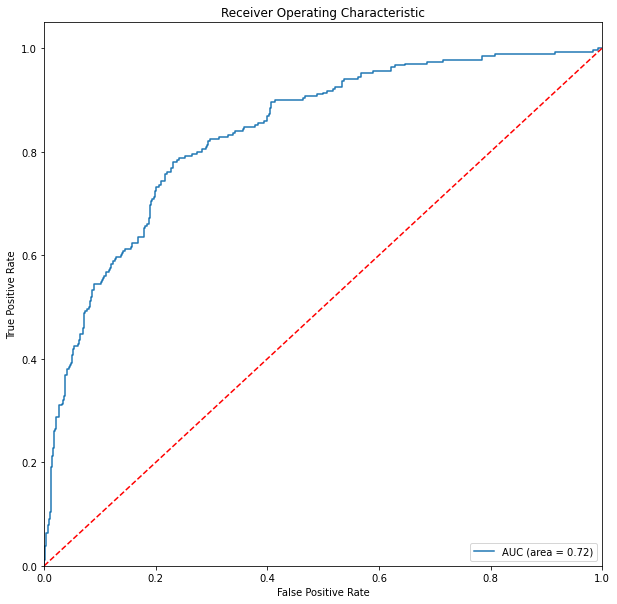

In [55]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.show()

### MODEL TUNING

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=42)

In [57]:
log_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [58]:
y_pred = log_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [61]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) 
RMSE

0.496742636335202

In [62]:
r2_score(y_test, y_pred)

-0.08998344370860956

In [66]:
confusion_matrix(y_test, y_pred)

array([[126,  25],
       [ 32,  48]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [69]:
log_model.predict_proba(X_test)[:10]

array([[0.66555143, 0.33444857],
       [0.77586412, 0.22413588],
       [0.80322329, 0.19677671],
       [0.78027091, 0.21972909],
       [0.55041427, 0.44958573],
       [0.57709834, 0.42290166],
       [0.94466361, 0.05533639],
       [0.3387429 , 0.6612571 ],
       [0.46982383, 0.53017617],
       [0.32262606, 0.67737394]])

In [75]:
cross_val_score(log_model, X_test, y_test, cv=20).mean()

0.7643939393939394

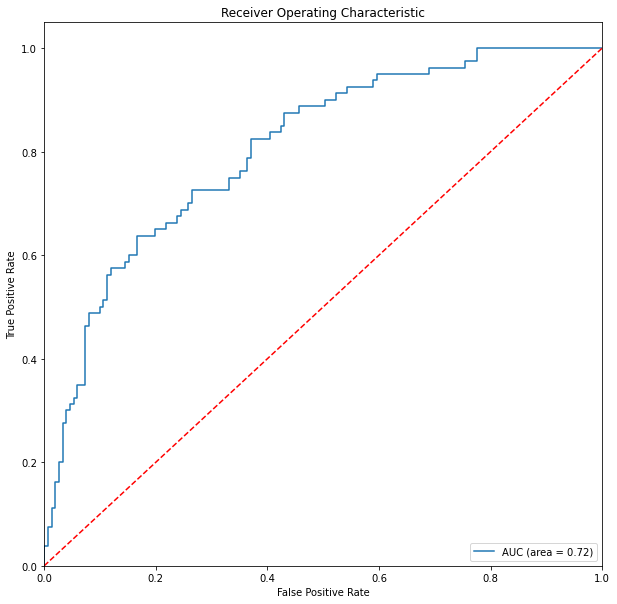

In [70]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.show()